In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = r'C:\Users\DELL\Downloads\Taller_2_dataset_breast_cancer.xlsx'
ejercicio = pd.read_excel(data, sheet_name='ejercicio')
ejercicio

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [5]:
X = ejercicio.drop('target', axis=1)
y = ejercicio['target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Crear y entrenar el modelo
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred_log = log_reg.predict(X_test_scaled)

In [9]:
# Crear y entrenar el modelo
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)  # Los árboles no necesitan escalado

# Predecir en el conjunto de prueba
y_pred_tree = tree.predict(X_test)

In [10]:
# Crear y entrenar el modelo
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)  # Random Forest tampoco necesita escalado

# Predecir en el conjunto de prueba
y_pred_forest = forest.predict(X_test)

In [11]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nEvaluación del modelo {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    
    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Benigno (0)', 'Maligno (1)'], 
                yticklabels=['Benigno (0)', 'Maligno (1)'])
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.ylabel('Real')
    plt.xlabel('Predicho')
    plt.show()


Evaluación del modelo Regresión Logística:
Accuracy: 0.9825
Precision: 0.9907
Recall: 0.9815
F1-Score: 0.9860


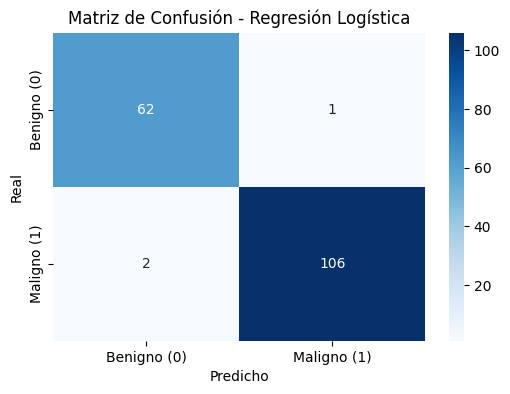


Evaluación del modelo Árbol de Decisión:
Accuracy: 0.9415
Precision: 0.9712
Recall: 0.9352
F1-Score: 0.9528


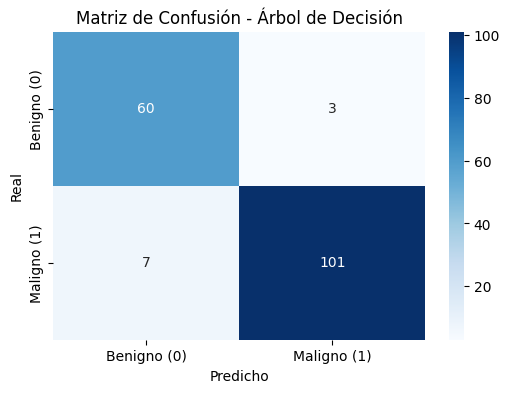


Evaluación del modelo Random Forest:
Accuracy: 0.9708
Precision: 0.9640
Recall: 0.9907
F1-Score: 0.9772


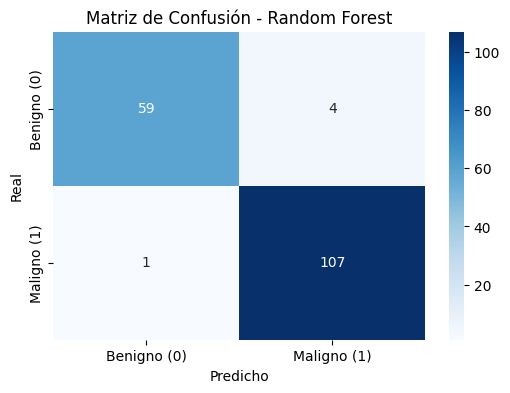

In [12]:
# Evaluar Regresión Logística
evaluate_model(y_test, y_pred_log, "Regresión Logística")

# Evaluar Árbol de Decisión
evaluate_model(y_test, y_pred_tree, "Árbol de Decisión")

# Evaluar Random Forest
evaluate_model(y_test, y_pred_forest, "Random Forest")